### 데이터 적재

데이터셋 : CIFAR-10
> 32 * 32 픽셀의 컬러이미지 6만개로 구성

In [1]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

NUM_CLASSES = 10

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# 기본적으로 이미지 데이터는 픽셀 채널마다 0에서 255 사이의 정수로 구성된다.
# 신경망은 입력이 -1과 1사이의 범위에 놓여있을 때 가장 잘 동작하기 떄문에 데이터를 255로 나누는 것이다.

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)
# 이미지의 정수 레이블을 원-핫 인코딩 벡터로 바꾼다. 어떤 이미지의 클래스 정수 레이블이 i라면,
# 이것의 원-핫 인코딩은 i번째 원소가 1이고 그 외에는 모두 0인 길이가 클래스 개수인 벡터이다.

# x_train의 크기가 [50000, 32, 32, 3]인데, 첫 번째 차원은 이미지의 인덱스이고, 2/3번째 차원은 이미지의 높이와 넓이이다.
# 마지막 차원은 RGB값이다.
x_train[100, 23, 19, 1]

0.5176471

### 모델 만들기

#### Sequental(), 함수형 API

* Sequental 모델
> 일렬로 층을 쌓은 네트워크를 빠르게 만들 때 사용하기 좋다.
* 함수형 API
> 가지가 있는 네트워크를 만들기 위해 사용해야한다.

### Sequental 모델을 사용한 네트워크

In [2]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential([
    Dense(200, activation='relu', input_shape=(32, 32, 3)),
    Flatten(),
    Dense(150, activation='relu'),
    Dense(10, activation='softmax'),
])

### 함수형 API를 사용한 네트워크

In [3]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model

input_layer = Input(shape=(32, 32, 3))

x = Flatten()(input_layer)

x = Dense(units=200, activation='relu')(x)
x = Dense(units=150, activation='relu')(x)

# 이부분을 요렇게 바꿀 수도 있다.
# x = Dense(unuts=200)(x)
# x = Activation('relu')(x)

output_layer = Dense(units=10, activation='softmax')(x)

model = Model(input_layer, output_layer)

* Input 층
> 네트워크의 시작점으로, 네트워크가 기대하는 입력 데이터 크기를 튜플로 알려주어야한다. 배치 크기는 지정하지 않는다.

* Flatten 층
> 입력을 하나의 벡터로 펼친다. 결과 벡터의 길이는 32 * 32 * 3 = 3072개이다. 이렇게 하는 이유는 뒤에 나오는 Dense층이 이렇게 사용해야하기 때문이다.

* Dense 층
> 가장 기본적으로 사용되는 층이다. 이 층은 이전 층과 완전하게 연결되는 유닛을 가지고 있다. 이 층의 유닛은 이전 층의 모든 유닛과 연결되어 있다. 연결마다 하나의 가중치가 동반된다. 유닛의 출력은 이전 층으로부터 받은 입력과 가중치를 곱하여 더한 것이다. 그 다음 활성화 함수를 통과하여 다음 층에 전달이 된다. 활성화 함수는 아주 중요한 역할을 담당한다.

### 활성화 함수

* #### ReLU(렐루)
> 입력이 음수이면 0이고 그 외에는 입력과 동일한 값을 출력한다. 리키렐루(LeakyRelu)는 입력에 비례하는 작은 음수를 반환한다. 절편이 이미 큰 음수값을 가지고 있어서 렐루 함수가 항상 0을 출력한다면 아무것도 할 수 없기 때문이다. 리키렐루는 그레디언트가 0이 되지 않도록 하여 이 문제를 해결한다. 렐루는 아주 믿을 만 하다!!! 렐루!!!

* #### sigmoid(시그모이드)
> 층의 출력을 0에서 1사이로 조정하고 싶을 때 유용하다. 예를 들어 하나의 출력 유닛을 가진 이진 분류 문제나 샘플이 하나 이상의 클래스에 속할 수 있는 다중 레이블 분류 문제에서 사용한다. 

* #### softmax(소프트맥스)
> 전체 출력 합이 1이 되어야 할 떄 사용한다. 예를 들어 샘플이 정확히 하나의 클래스에만 속해야하는 다중 분류 문제에서 사용한다. 이 예제에서는 소프트맥스를 사용하여 이 값을 이미지가 10개의 클래스에 속할 확률로 이해할 수 있다. 

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_4 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


### 모델 컴파일

In [5]:
from keras.optimizers import Adam

opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,
             metrics=['accuracy'])


### 손실함수
* #### 평균 제곱 오차(mean squared error)
> 신경망이 회귀 문제(연속적인 값 해석)일 때 이 함수를 사용한다. 이 함수는 각 샘플의 정답 y와 예측 값 p 사이 차이를 제곱하고 모든 샘플에 평균한 것이다.

* #### 범주형 크로스 엔트로피(categorical cross_entropy)
> 샘플이 여러 클래스 중 하나에 속해야 하는 분류 문제라면 이 함수를 사용한다. 

* #### 이진 크로스 엔트로피(binary cross_entropy)
> 하나의 출력 유닛을 가진 이진 분류 문제이거나 샘플이 여러 개의 클래스에 속할 수 있는 다중 레이블 문제라면 이진 크로스 엔트로피를 사용한다.

### 옵티마이저
> 손실 함수 기반의 그레디언트를 기반으로 신경망의 가중치를 업데이트하기 위해 사용하는 알고리즘이다. 가장 널리 사용되는 것이 RMSProp, Adam이다. metrics 매개변수는 정확도(accuracy)같은 훈련 과정에서 기록하고 싶은 지표를 추가로 지정할 수 있다.

### 모델 훈련

In [6]:
history = model.fit(x_train, # 원본 이미지 데이터
        y_train, # 원-핫 인코딩 된 클래스 레이블
         batch_size=32, # 훈련 스텝마다 네트워크에 전달될 샘플의 개수
         epochs=10, # 반복하여 훈련할 횟수
         shuffle=True) # 훈랸 스텝마다 배치를 하면 중복을 허용하지 않고 랜덤하게 추출하는 것

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9696 - accuracy: 0.2848
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6908 - accuracy: 0.3980
Epoch 3/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.6021 - accuracy: 0.4285
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5413 - accuracy: 0.4503
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5027 - accuracy: 0.4669
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4519 - accuracy: 0.4852
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4340 - accuracy: 0.4920
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4014 - accuracy: 0.4994
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3784 - accuracy: 0.5107
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.362

### 모델 평가

In [7]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4440 - accuracy: 0.4882


[1.4439996480941772, 0.48820000886917114]

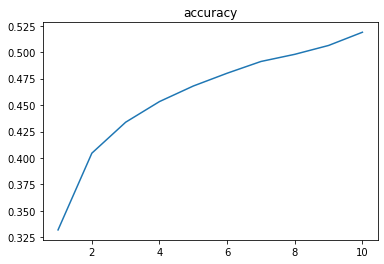

In [8]:
import matplotlib.pyplot as plt
plt.figure()

acc = history.history['accuracy']

plt.plot(range(1, len(acc) + 1), acc)
plt.title('accuracy')

plt.show()

### predict 메서드를 사용해서 테스트 세트에 대한 예측 결과 확인

In [9]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
                   'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
# preds는 [10000, 10] 크기의 배열로 샘플마다 10개의 클래스 확률을 담은 벡터가 반환된다.
preds_single = CLASSES[np.argmax(preds, axis= -1)]
# 이 확률 배열을 argmax함수를 사용해 하나의 예측 결과로 바꾼다. 여기에서 axis=-1은 마지막 차원으로 배열을 압축하라는 뜻이다.
# 결국 크기가 [10000, 1]이 된다.
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

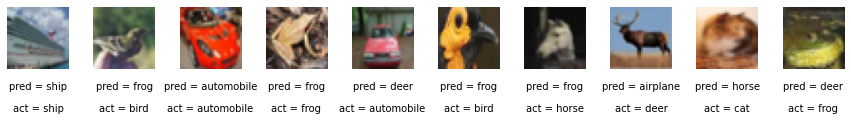

In [10]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = '+ str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

## 모델 성능 향상

#### 앞선 네트워크가 성능이 안좋은 이유는 입력 이미지의 공간 구조를 다룰 수 있는 요소가 네트워크에 없기 때문이다!! 이걸 해결하기 위해서 케라스 책에서 배운 합성곱층(convolution layer)을 사용한다.

> 합성곱은 필터를 이미지의 일부분과 픽셀끼리 곱한 후 결과를 더하는 것이다. 이미지 영역이 필터와 비슷할 수록 큰 양수가 출력되고 필터와 반대일수록 큰 음수가 출력된다.

> 필터를 전체 이미지에 대해서 왼쪽에서 오른쪽으로 위 아래로 이동하면서 합성곱의 출력을 기록한다. 이를 통해 필터의 값에 따라 입력에서 어떤 특성을 골라낸 새로운 배열을 얻을 수 있다. 이것이 바로 합성곱 층이 하는 일이다. 보통 여러개의 필터를 사용한다.

### 케라스에서는 Conv2D층을 사용해 높이와 너비를 가진 입력 텐서에 합성곱을 적용한다.

In [11]:
from keras.layers import Conv2D

input_layer = Input(shape=(64, 64, 1))

conv_layer_1 = Conv2D(
    filters=2,
    kernel_size=(3, 3),
    strides=1,
    padding='same')(input_layer)

### Stride(스트라이트)

> 이 매개변수는 필터가 한 번에 입력 위를 이동하는 크기이다. 스트라이드를 크게 하면 출력 텐서의 크기가 줄어든다. 예를 들어 ```strides = 2```로 하면 출력 텐서의 높이와 너비는 입력 텐서의 절반이 된다. 네트워크를 통과하면서 채널의 수는 늘리고 텐서의 공간 방향 크기를 줄이는데 사용할 수 있다.

### Padding(패딩)

> ```padding = 'same'``` 매개변수는 입력 데이터를 0으로 패딩하여 ```strides=1```일 대 출력의 크기를 입력의 크기와 같게 한다. 

> ```padding = 'same'```으로 지정하면 여러 개의 합성곱 층을 통과할 때 텐서의 크기를 쉽게 파악할 수 있기 때문에 유용하다.

### 케라스로 정의한 Conv2D 네트워크

In [12]:
input_layer = Input(shape=(32, 32, 3))

conv_layer_1 = Conv2D(
    filters=10,
    kernel_size=(4, 4),
    strides=2,
    padding='same')(input_layer)

conv_layer_2 = Conv2D(
    filters = 20,
    kernel_size=(3, 3),
    strides=2,
    padding='same')(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units = 10, activation='softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [13]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________
